## In-Class Lecture 36-2 - Multithreading Pizza Party

In this in-class activity, you will hone your skills in multithreading and resource management. 

### School Pizza Party

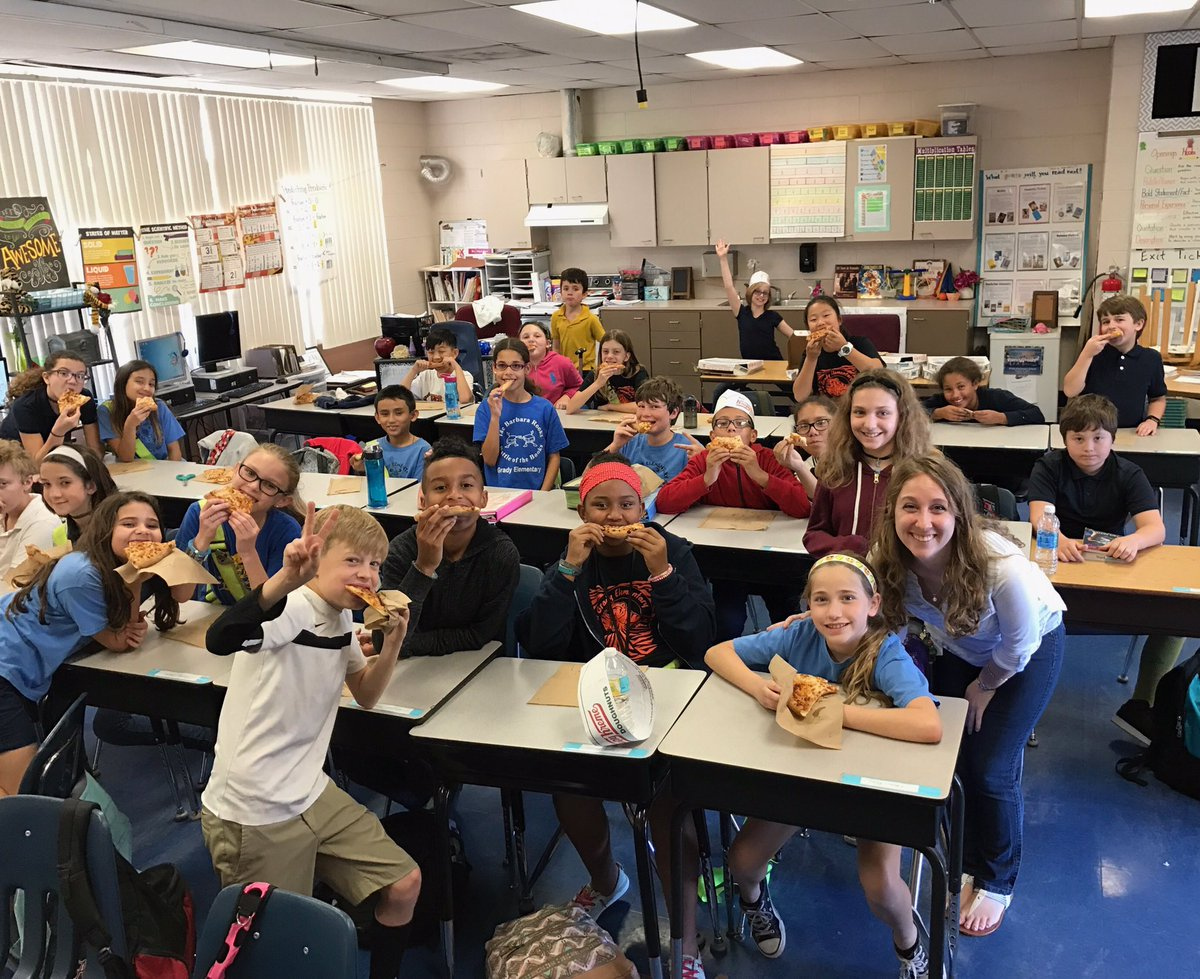

For our thought experiment, let's say you are hosting a Pizza Party. There are 15 kids, and you have ordered six pizzas with 8 slices each.

    Total of 48 slides
    
    Total of 15 kids

You experience the same challenges when multithreading as we do when we are trying to keep 15 kids organized. You want to make sure everyone gets a fair number of pieces, but whew! is that easier said than done.

To simplify this lab assignment, thus making it appropriate for this class, we will assume that the kids will always want to eat until the pizza boxes are empty. 

### Pizza Party Rules
<ul>
    <li>If a kid has not had a slice yet, they can initially get two slices</li>
    <li>No kid can get a third until every kid has two slices</li>
    <li>No kid can get a fourth until every kid has three slides</li>
    <li>Some kids are greedy and try to take more than they should eat. So if they try to take more than they should at any given moment, we need to keep them from trying to steal pizza.</li>
    <li>Once the pizza boxes are empty, the kids should not try to take any more pizza, which means we need to ensure we properly terminate the program.</li>
</ul>

## Obtaining the Files

Run the following commands from your GitHub folder:

    mkdir lec36
    cd lec36
    wget ....

In order to compile the code, we need to include the <code>-lpthread</code> compiler flag. 

Therefore, the two commands you will need to run are shown below. Note that you will need to complete several steps before the code will fully compile because you need to meet PQC rules:

    g++ -std=c2a -Wall -Wextra -Werror -Wconversion -lpthread pizza_party.cpp -o pizza_party
    ./pizza_party

## Setting Up The Input Struct and Void* Function

### Part 1 - PThread Mutual Exclusion

In the pizza_party.c file, look for Step 1 near the top of the file. You will create a pthread_mutex_t Lock set to the C++ compiler directive:

    PTHREAD_MUTEX_INITIALIZER.

The code you will write is essentially identical to the code in the <a href = "https://github.com/mmorri22/cse20133/blob/main/inclass/lec35/pthread_in_class_sol.cpp">pthread_in_class_sol.cpp</a> at Line 6.


### Part 2 - Define the Thread Function Input Arguments

In order to define the thread, you need to create a <code>thread_func_args</code> struct that will serve as the pointer to the input for the functions. The code you will write is essentially identical to the code in the <a href = "https://github.com/mmorri22/cse20133/blob/main/inclass/lec35/pthread_in_class_sol.cpp">pthread_in_class_sol.cpp</a> at Lines 9-15, except the four private members will be as follows:

    pthread_t curr_tid;
    int kid_id;
    int curr_slices;
    int* pizza_ptr;
    
    
### Part 3 - Casting the input thread argument back to the struct in the function 

The next step is to cast the void pointer back to the thread_func_args struct in the function.

You will see that the void* thread_func( void* inputs ) function declaration is already provided for you, as well as the locations for each step.

What you will do is essentially identical to the <a href = "https://github.com/mmorri22/cse20133/blob/main/inclass/lec35/pthread_in_class_sol.cpp">pthread_in_class_sol.cpp</a> code at Line 22.


### Part 4 - Casting the input thread argument back to the struct in the function 

The next step is to loop while the total remaining pizza slices are greater than 0.

Remember that, since the pizza_ptr is a pointer to the integer in main, you will need to de-reference it

To access the value, remember to de-reference the pizza_ptr: 

    *(func_inputs->pizza_ptr)
    
Very similar to what we did in the <a href = "https://github.com/mmorri22/cse20133/blob/main/inclass/lec35/pthread_in_class_sol.cpp">pthread_in_class_sol.cpp</a> code at Lines 33 and 34 for the variable int_ptr.


### Part 5 - Breaking the while loop if the number of pizzas is equal to 0 

If the pizza_ptr value is equal to 0, then break the while loop.

We need to do this before we lock the thread to prevent starvation.


### Part 6 - Lock the pthread_mutex_lock 

Once we get to this point, it is akin to a kid reaching the front of the line. They are the only kid able to access the pizza.

What you will do is essentially identical to the <a href = "https://github.com/mmorri22/cse20133/blob/main/inclass/lec35/pthread_in_class_sol.cpp">pthread_in_class_sol.cpp</a> at Line 26.


### Part 7 - If the pizza_ptr's total is greater than 18 AND the user's curr_slices is less than 2

This is the first of three if/else conditions we will use to simulate the threads.
<ul>
    <li>Create an integer for number of slices that is 2 minus the kid's curr_slices </li>
    <li>Subtract the number of slices from the total slices of pizza</li>
    <li>Add the number of slices to the output </li>
    <li>Print the information to the user </li>
    <ul><li>The code for printing the information to the user is provided for you</li></ul>
</ul>

### Part 8 - Else If the pizza_ptr is less than or equal to 18 AND the pizza_ptr is greater than 3  AND the user's curr_slices is less than 3

Second of three if/else conditions we will use to simulate the threads.

The Else If condition must meet the following:

    pizza_ptr is less than or equal to 18 AND
    pizza_ptr is greater than 3 AND
    the user's curr_slices is less than 3

Inside the else if statement, you need to do the following:

    Subtract one from the pizza_ptr
    Add one to the curr_slices 
    Print the information to the user 
        The code for printing the information to the user is provided for you


### Part 9 - Else if the pizza_ptr is less than or equal to 3 and the pizza_ptr is greater than 1 

Second of three if/else conditions we will use to simulate the threads.

The Else If condition must meet the following:

    pizza_ptr is less than or equal to 3 AND
    pizza_ptr is greater than or equal to 1

Inside the else if statement, you need to do the following:

    Subtract one from the pizza_ptr
    Add one to the curr_slices 
    Print the information to the user 
    The code for printing the information to the user is provided for you


### Part 10 - Unlock the pthread_mutex_lock

You will unlock the pthread mutex to release the mutual exclusion on the integer pointer.

What you will do is essentially identical to the <a href = "https://github.com/mmorri22/cse20133/blob/main/inclass/lec35/pthread_in_class_sol.cpp">pthread_in_class_sol.cpp</a> code at Line 36.

   

### Part 11 - return NULL

Each pthread must return a void*. In this course, we have limited the scope to returning NULL. But you must state return NULL;

What you will do is essentially identical to the <a href = "https://github.com/mmorri22/cse20133/blob/main/inclass/lec35/pthread_in_class_sol.cpp">pthread_in_class_sol.cpp</a> code at Line 39.

## Creating and Joining Threads in Main

### Part 1 - Create the thread_inputs

Go to the main function, where you will create pointers to pointers for the input threads

The code you will write is essentially identical to the code in the<a href = "https://github.com/mmorri22/cse20133/blob/main/inclass/lec35/pthread_in_class_sol.cpp">pthread_in_class_sol.cpp</a> at Line 96.

      

### Part 2 - Create the parallel threads

Go to the main function, where you will create the parallel threads themselves. The function that will be called is essentially identical to the create_parallel_threads presented in Lecture, except the kid_id is created based on the iteration.

The code you will write is essentially identical to the code in the <a href = "https://github.com/mmorri22/cse20133/blob/main/inclass/lec35/pthread_in_class_sol.cpp">pthread_in_class_sol.cpp</a> at Line 102, except you will

    pass num_kids instead of num_threads by value
    pass pizza_slices by reference instead of solution
   

### Part 3 - Join the parallel threads

Go to the main function, where you will join the parallel threads themselves. The function that will be called is essentially identical to the create_parallel_threads presented in Lecture, except the kid_id is created based on the iteration.

The code you will write is essentially identical to the code in the <a href = "https://github.com/mmorri22/cse20133/blob/main/inclass/lec35/pthread_in_class_sol.cpp">pthread_in_class_sol.cpp</a> at Line 105, except you will 

    pass num_kids instead of num_threads by value
   

### Part 4 - Exit and close the parallel threads

Go to the main function, where you will close the parallel threads themselves. You do this by calling pthread_exit( NULL );

    Should be the last thing in main before return 0 if using this
    Ensures main does not end before all the threads are closed

The code you will write is essentially identical to the code in the <a href = "https://github.com/mmorri22/cse20133/blob/main/inclass/lec35/pthread_in_class_sol.cpp">pthread_in_class_sol.cpp</a> at Line 115   

## Compiling and Executing the Code

In order to compile the code, we need to include the -lpthread compiler flag. 

Therefore, the two commands you will need to run as the following:

    g++ -std=c2a -Wall -Wextra -Werror -Wconversion -lpthread pizza_party.cpp -o pizza_party
    ./pizza_party
    
The following run is an example run of the Lab Assignment. Since the code is in parallel, the kid_id printed will be in a different order. However, the total slices remaining will be in the same order. Also, the program will properly terminate.

    > g++ -std=c2a -Wall -Wextra -Werror -Wconversion -lpthread pizza_party.cpp -o pizza_party
    > ./pizza_party 
    Initial Pizza Slices = 48 for 15 kids 
    Kid 0 ate 2 slices and has eaten 2 slices. There are 46 total slices remaining. 
    Kid 1 ate 2 slices and has eaten 2 slices. There are 44 total slices remaining. 
    Kid 3 ate 2 slices and has eaten 2 slices. There are 42 total slices remaining. 
    Kid 6 ate 2 slices and has eaten 2 slices. There are 40 total slices remaining. 
    Kid 4 ate 2 slices and has eaten 2 slices. There are 38 total slices remaining. 
    Kid 8 ate 2 slices and has eaten 2 slices. There are 36 total slices remaining. 
    Kid 9 ate 2 slices and has eaten 2 slices. There are 34 total slices remaining. 
    Kid 10 ate 2 slices and has eaten 2 slices. There are 32 total slices remaining. 
    Kid 11 ate 2 slices and has eaten 2 slices. There are 30 total slices remaining. 
    Kid 5 ate 2 slices and has eaten 2 slices. There are 28 total slices remaining. 
    Kid 12 ate 2 slices and has eaten 2 slices. There are 26 total slices remaining. 
    Kid 7 ate 2 slices and has eaten 2 slices. There are 24 total slices remaining. 
    Kid 14 ate 2 slices and has eaten 2 slices. There are 22 total slices remaining. 
    Kid 13 ate 2 slices and has eaten 2 slices. There are 20 total slices remaining. 
    Kid 2 ate 2 slices and has eaten 2 slices. There are 18 total slices remaining. 
    Kid 10 ate 1 slice and has eaten 3 slices. There are 17 total slices remaining. 
    Kid 12 ate 1 slice and has eaten 3 slices. There are 16 total slices remaining. 
    Kid 5 ate 1 slice and has eaten 3 slices. There are 15 total slices remaining. 
    Kid 0 ate 1 slice and has eaten 3 slices. There are 14 total slices remaining. 
    Kid 4 ate 1 slice and has eaten 3 slices. There are 13 total slices remaining. 
    Kid 1 ate 1 slice and has eaten 3 slices. There are 12 total slices remaining. 
    Kid 14 ate 1 slice and has eaten 3 slices. There are 11 total slices remaining. 
    Kid 6 ate 1 slice and has eaten 3 slices. There are 10 total slices remaining. 
    Kid 13 ate 1 slice and has eaten 3 slices. There are 9 total slices remaining. 
    Kid 2 ate 1 slice and has eaten 3 slices. There are 8 total slices remaining. 
    Kid 8 ate 1 slice and has eaten 3 slices. There are 7 total slices remaining. 
    Kid 11 ate 1 slice and has eaten 3 slices. There are 6 total slices remaining. 
    Kid 9 ate 1 slice and has eaten 3 slices. There are 5 total slices remaining. 
    Kid 3 ate 1 slice and has eaten 3 slices. There are 4 total slices remaining. 
    Kid 7 ate 1 slice and has eaten 3 slices. There are 3 total slices remaining. 
    Kid 14 ate 1 slice and has eaten 4 slices. There are 2 total slices remaining. 
    Kid 11 ate 1 slice and has eaten 4 slices. There are 1 total slices remaining. 
    Kid 0 ate 1 slice and has eaten 4 slices. There are 0 total slices remaining. 
    > rm pizza_party